# 1
Regularization. Using the accompanying Hitters dataset, we will explore
regression models to predict a player’s Salary from other variables. You must
python.
https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Hitters.csv').dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 45.2+ KB


In [4]:
df

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.000,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.000,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.000,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.500,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.000,A
6,-Al Newman,185,37,1,23,8,21,2,214,42,...,30,9,24,N,E,76,127,7,70.000,A
7,-Argenis Salazar,298,73,0,24,24,7,3,509,108,...,41,37,12,A,W,121,283,9,100.000,A
8,-Andres Thomas,323,81,6,26,32,8,2,341,86,...,32,34,8,N,W,143,290,19,75.000,N
9,-Andre Thornton,401,92,17,49,66,65,13,5206,1332,...,784,890,866,A,E,0,0,0,1100.000,A
10,-Alan Trammell,574,159,21,107,75,59,10,4631,1300,...,702,504,488,A,E,238,445,22,517.143,A


In [5]:
## Target variable
y = df.Salary
## Drop name, and factorial variables
X = df.drop(["Unnamed: 0","Salary","League","Division","NewLeague"],axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25


## 1.1
Use LASSO regression to predict Salary from the other numeric predictors.
Create a visualization of the coefficient trajectories. Comment on which are the
final three predictors that remain in the model. Use cross-validation to find the
optimal value of the regularization penality. How many predictors are left in
that model?

In [6]:
alphas = 10**np.linspace(10,-2,100)*0.5

Text(0.5, 1.0, 'Coefficients Trajectory')

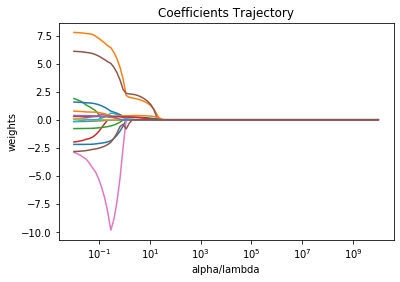

In [7]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha/lambda')
plt.ylabel('weights')
plt.title("Coefficients Trajectory")

In [8]:
## alpha = 9
lasso = Lasso(alpha=9, max_iter=10000, normalize=True)
lasso.fit(X, y)
pd.Series(lasso.coef_, index=X.columns)

AtBat      0.000000
Hits       0.542109
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.306345
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.085858
CRBI       0.232542
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

In [9]:
## alpha = 10
lasso = Lasso(alpha=10, max_iter=10000, normalize=True)
lasso.fit(X, y)
pd.Series(lasso.coef_, index=X.columns)

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

In [10]:
## alpha = 11
lasso = Lasso(alpha=11, max_iter=10000, normalize=True)
lasso.fit(X, y)
pd.Series(lasso.coef_, index=X.columns)

AtBat      0.000000
Hits       0.037439
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.062909
CRBI       0.176160
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

In [11]:
## alpha = 12
lasso = Lasso(alpha=12, max_iter=10000, normalize=True)
lasso.fit(X, y)
pd.Series(lasso.coef_, index=X.columns)

AtBat      0.000000
Hits       0.000000
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.039196
CRBI       0.150027
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

In [12]:
print("When the alpha is 10 or 11, Hits, CRuns and CRBI are final three predictors that remain in the model")

When the alpha is 10 or 11, Hits, CRuns and CRBI are final three predictors that remain in the model


In [13]:
## CV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, y)
print("The optimal value of the regularization penality is",lassocv.alpha_)


The optimal value of the regularization penality is 0.0635481759985745


In [14]:
pd.Series(lassocv.coef_, index=X.columns)

AtBat     -2.082954
Hits       7.041011
HmRun      0.000000
Runs      -0.682615
RBI        0.496552
Walks      5.511781
Years     -6.107625
CAtBat    -0.087066
CHits      0.000000
CHmRun     0.156468
CRuns      1.228061
CRBI       0.583821
CWalks    -0.690601
PutOuts    0.292694
Assists    0.304372
Errors    -2.450795
dtype: float64

In [15]:
print("14 predictors are left in the model")

14 predictors are left in the model


## 1.2
Repeat with Ridge Regression. Visualize coeffecient trajectories. Use crossvalidation to find the optimal vaule of the regularization penalty.

Text(0.5, 1.0, 'Coefficients Trajectory')

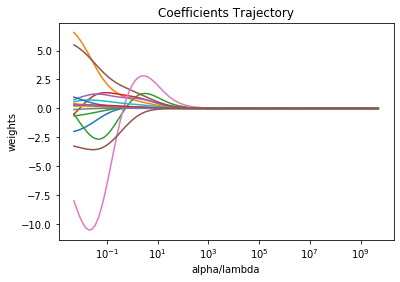

In [16]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha/lambda')
plt.ylabel('weights')
plt.title('Coefficients Trajectory')

In [17]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X, y)
ridgecv.alpha_
print("The optimal value of the regularization penality is",ridgecv.alpha_)

The optimal value of the regularization penality is 0.01155064850041579


# 2
Short Answer. Explain in your own words the bias-variance tradeoff. What
role does regularization play in this tradeoff? Make reference to your findings
in number (1) to describe models of high/low bias and variance.

### 1
Bias and variance are expected to be low in ideal prediction model. In real world, having a lower bias will increase the variance, and vise versa. We need to find a point where both bias and variance are relatively low.

### 2
Regularization plays a role of perventing overfitting. It will have a higher bias and get a lower variance so that the model will not overfitting.

### 3
In the Lasso and Ridge regression, a larger the penalty will generate a higher bias and lower variance. Refer to the Lasso model when the regularization penalty is 0.0635481759985745, it has 14 predictors left. The bias is relatively small and the variance is low, it prevents the model from overfitting.